Welcome to Methods of Vizualization for Neuroscience.
We will learn to make some plots in Jupyter Notebook using Python 3.x 

In [14]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

In [2]:
# read file data in X
data = np.loadtxt('dataAnalySim.csv')
X = data[:]
len(X)
X.shape
X[2]
X[2,8]  # the column of parameter H

0.0

Text(0.5, 1.0, 'Visualization of data')

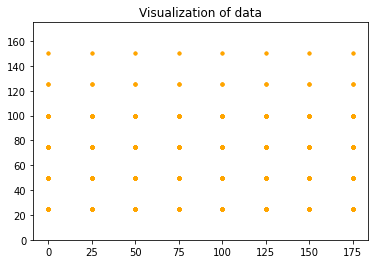

In [3]:
# Provide a two-dimension plot of the data. Scatter plot of all data projected 
# on the 8th column (H parameter). On Y axis we plot the value of CaS parameter 
# (on column 6)

plt.figure()
plt.plot(X[:,8], X[:,6], '.', color='orange');
plt.ylim(0,175)
plt.title("Visualization of data")

Text(0.5, 1.0, 'Visualization of data')

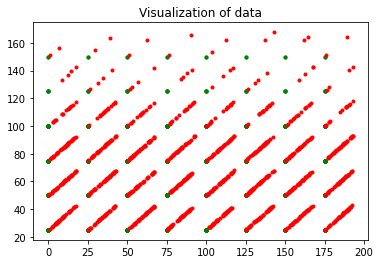

In [4]:
# Provide a 2D plot of the data. Scatter plot of all data projected 
# on the 8th column (H parameter) on X axis and on the 6th column 
# (CaS parameter) on Y axis.
X_1 = []; Y_1 = []
X_2 = []; Y_2 = []
X_3 = []; Y_3 = []
X_4 = []; Y_4 = []
X_5 = []; Y_5 = []
X_6 = []; Y_6 = []
X_7 = []; Y_7 = []
X_8 = []; Y_8 = []

for i, item in enumerate(X[:,8]):
    if item == 0:
      aux = rand.randint(1,180)/10
      X_1.append(X[i,8]+aux)
      Y_1.append(X[i,6]+aux)
    if item == 25:
      aux = rand.randint(1,180)/10
      X_2.append(X[i,8]+aux)
      Y_2.append(X[i,6]+aux)
    if item == 50:
      aux = rand.randint(1,180)/10
      X_3.append(X[i,8]+aux)
      Y_3.append(X[i,6]+aux)
    if item == 75:
      aux = rand.randint(1,180)/10
      X_4.append(X[i,8]+aux)
      Y_4.append(X[i,6]+aux)   
    if item == 100:
      aux = rand.randint(1,180)/10
      X_5.append(X[i,8]+aux)
      Y_5.append(X[i,6]+aux)
    if item == 125:
      aux = rand.randint(1,180)/10
      X_6.append(X[i,8]+aux)
      Y_6.append(X[i,6]+aux)    
    if item == 150:
      aux = rand.randint(1,180)/10
      X_7.append(X[i,8]+aux)
      Y_7.append(X[i,6]+aux)
    if item == 175:
      aux = rand.randint(1,180)/10
      X_8.append(X[i,8]+aux)
      Y_8.append(X[i,6]+aux)      

plt.plot(X[:,8], X[:,6], '.', color='green');
plt.plot(X_1[:], Y_1[:], '.', color='red');
plt.plot(X_2[:], Y_2[:], '.', color='red');
plt.plot(X_3[:], Y_3[:], '.', color='red');
plt.plot(X_4[:], Y_4[:], '.', color='red');
plt.plot(X_5[:], Y_5[:], '.', color='red');
plt.plot(X_6[:], Y_6[:], '.', color='red');
plt.plot(X_7[:], Y_7[:], '.', color='red');
plt.plot(X_8[:], Y_8[:], '.', color='red');
plt.title("Visualization of data")

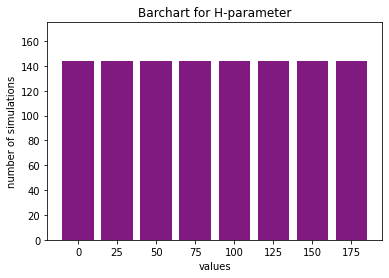

In [5]:
# Barchart of H parameter distributions
Xbar = ['0','25','50','75','100','125','150','175']
height = [len(X_1),len(X_2),len(X_3),len(X_4),len(X_5),len(X_6),len(X_7),len(X_8)]
x_pos = [i for i, _ in enumerate(Xbar)]

plt.bar(x_pos, height, color = (0.5,0.1,0.5,1))

# Add title and axis names
plt.title('Barchart for H-parameter')
plt.xlabel('values')
plt.ylabel('number of simulations')

# Limits for the Y axis
plt.ylim(0,175)

# Add labels for bars
plt.xticks(x_pos, Xbar)

# Show graphic
plt.show()


[0, 328, 344, 304, 128, 32, 16, 0]


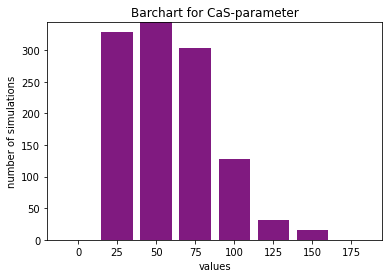

In [ ]:
# Exercise: make a barchart of the CaS parameter (column 6)



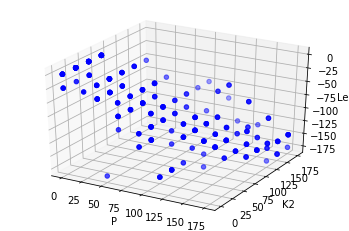

In [15]:
# reproducing Fig 1 from Doloc-Mihu and Calbrese, eNeuro, 2016.
dataNew = np.loadtxt('data-3D-parameterPlot.csv')
XN = dataNew[:]
len(XN)
XN.shape

figNew = plt.figure()
axNew = figNew.add_subplot(111, projection='3d')

axNew.scatter(XN[:,2], XN[:,3], -XN[:,4], zdir='z', c= 'blue')
axNew.set(xlabel='P',ylabel='K2',zlabel='Leak')
plt.savefig("data3D-params-P-K2-Leak.png")

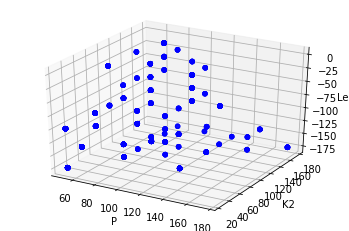

In [16]:
# A 3D plot of the data space in (P, K2, Leak) parametric space; that is
# columns (2,3,4)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,2], X[:,3], -X[:,4], zdir='z', c= 'blue')
ax.set(xlabel='P',ylabel='K2',zlabel='Leak')
plt.savefig("data3D-H-CaS.png")

In [28]:
# Make #D plot interactive in the notebook
# https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners
# https://plotly.com/python/3d-axes/

# Import dependencies
import plotly.graph_objs as go

# render figure with standard settings
fig = go.Figure(data=[go.Scatter3d(x=XN[:,2], y=XN[:,3], z=XN[:,4], 
                                   mode='markers', 
                                   marker=dict(size=10, color='rgb(0,0,255)')
                                   ),
                      ],                   
                layout = go.Layout(title = '3D Scatter plot',
                                   margin={'l': 0, 'r': 0, 'b': 0, 't': 0}) 
                )

fig.update_layout(scene = dict(yaxis = dict(nticks=8, 
                                            tickfont=dict(color='green',
                                                          size=15,
                                                          family='Old Standard TT, serif',)
                                            ),
                               xaxis_title='P parameter',
                               yaxis_title='K2 parameter',
                               zaxis_title='Leak parameter'
                               ),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

# make sure that Colab renders Plotly
fig.show(renderer="colab")